In [2]:
import numpy as np
import pandas as pd

# Recommenders with NMF
### Non-negative Matrix factorization

### Idea
- We approximate (the missing values of) the matrix we need: user-rating matrix decomposing the information of the final matrix by *factorizing* it into two other ones that we can actually derive
- *factorizing*: decomposing a matrix into a product of two matrices
- *non-negative*: all of our matrices only allow positive values

### The Data
#### Matrix of Users:Ratings (Rtrue) 

In [24]:
movies = ['Titanic', 'Breakfast at Tiffanys', 'Terminator', 'Star Trek', 'Star Wars']
users = ['Ada', 'Bob', 'Steve', 'Margaret']
Rtrue = np.array([[5, 4, 1, 1, np.nan],
                  [3, 2, 1, np.nan, 1],
                  [np.nan, np.nan, np.nan, np.nan, 5],
                  [1, 1, 5, 4, 4]])

In [25]:
df = pd.DataFrame(Rtrue, index=users, columns=movies)
df

,Titanic,Breakfast at Tiffanys,Terminator,Star Trek,Star Wars
Ada,5.0,4.0,1.0,1.0,NaN
Bob,3.0,2.0,1.0,NaN,1.0
Steve,NaN,NaN,NaN,NaN,5.0
Margaret,1.0,1.0,5.0,4.0,4.0


#### More interesting data 

In [41]:
df = pd.read_csv('data/movies_pca_pasilla.csv', index_col= 'User', na_values = ['-', 'Nan'])

In [54]:
def replace_comma_with_dot(df):
    column_names = df.columns
    for column_name in column_names:
        df[column_name] = [float(str(i).replace(",", ".")) for i in list(df[column_name])]
    return df

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,5.0,NaN,2.0,4.0,5.0,2.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN,5.0
Madhur,5.0,5.0,4.5,4.0,5.0,NaN,4.5,NaN,5.0,4.0,NaN,NaN,4.5,5.0
Mandana,NaN,NaN,4.0,5.0,5.0,2.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,5.0
Daniel,3.0,3.0,4.5,5.0,5.0,5.0,4.5,3.0,3.5,3.0,4.0,3.0,NaN,3.0
shaimaa,5.0,3.0,4.0,3.0,NaN,3.0,3.0,5.0,5.0,NaN,4.0,5.0,NaN,5.0
Edgar,4.0,3.0,5.0,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,NaN,NaN,3.0
Mitun,5.0,5.0,5.0,4.0,3.0,2.0,3.0,5.0,3.0,4.0,4.0,1.0,3.0,3.0
Georg,5.0,5.0,5.0,5.0,5.0,3.0,2.0,NaN,2.0,5.0,5.0,NaN,5.0,4.0
Hassan,NaN,5.0,NaN,NaN,5.0,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,4.0


In [55]:
df = replace_comma_with_dot(df)

In [56]:
df

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,5.0,NaN,2.0,4.0,5.0,2.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN,5.0
Madhur,5.0,5.0,4.5,4.0,5.0,NaN,4.5,NaN,5.0,4.0,NaN,NaN,4.5,5.0
Mandana,NaN,NaN,4.0,5.0,5.0,2.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,5.0
Daniel,3.0,3.0,4.5,5.0,5.0,5.0,4.5,3.0,3.5,3.0,4.0,3.0,NaN,3.0
shaimaa,5.0,3.0,4.0,3.0,NaN,3.0,3.0,5.0,5.0,NaN,4.0,5.0,NaN,5.0
Edgar,4.0,3.0,5.0,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,NaN,NaN,3.0
Mitun,5.0,5.0,5.0,4.0,3.0,2.0,3.0,5.0,3.0,4.0,4.0,1.0,3.0,3.0
Georg,5.0,5.0,5.0,5.0,5.0,3.0,2.0,NaN,2.0,5.0,5.0,NaN,5.0,4.0
Hassan,NaN,5.0,NaN,NaN,5.0,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,4.0


The NMF algorithm in sklearn doesn't take missing values...
Other options that do take missing values: http://surpriselib.com/

### 0. How do we deal with missing values (Imputation)?
##### Ideas?
- Fill with mean or median (e.g. 2 or 3, 2.5) <- easy, quick, maybe good enough?
- Fill in with 0 <- would be interpreted as "person didn't like the movie", not such a good idea
- Fill missing values with more sophisticated algorith:
    - e.g. mean user rating for similar movie genre
    - KNN imputer (exists in sklearn): computational expensive

In [28]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(strategy = 'constant', fill_value= 2.5)

In [58]:
Rtrue = imputer.fit_transform(df)

In [59]:
Rtrue

array([[5. , 2.5, 2. , 4. , 5. , 2. , 5. , 5. , 5. , 5. , 4. , 2.5, 2.5,
        5. ],
       [5. , 5. , 4.5, 4. , 5. , 2.5, 4.5, 2.5, 5. , 4. , 2.5, 2.5, 4.5,
        5. ],
       [2.5, 2.5, 4. , 5. , 5. , 2. , 4. , 5. , 5. , 4. , 2.5, 2.5, 2.5,
        5. ],
       [3. , 3. , 4.5, 5. , 5. , 5. , 4.5, 3. , 3.5, 3. , 4. , 3. , 2.5,
        3. ],
       [5. , 3. , 4. , 3. , 2.5, 3. , 3. , 5. , 5. , 2.5, 4. , 5. , 2.5,
        5. ],
       [4. , 3. , 5. , 4. , 4. , 5. , 3. , 4. , 3. , 4. , 5. , 2.5, 2.5,
        3. ],
       [5. , 5. , 5. , 4. , 3. , 2. , 3. , 5. , 3. , 4. , 4. , 1. , 3. ,
        3. ],
       [5. , 5. , 5. , 5. , 5. , 3. , 2. , 2.5, 2. , 5. , 5. , 2.5, 5. ,
        4. ],
       [2.5, 5. , 2.5, 2.5, 5. , 4. , 4. , 2.5, 4. , 2.5, 2.5, 4. , 2.5,
        4. ],
       [3. , 2.5, 3. , 5. , 5. , 3. , 3. , 2. , 2. , 4. , 2. , 2.5, 2.5,
        4. ],
       [4. , 4. , 5. , 4. , 4. , 2.5, 3. , 3. , 3. , 4. , 4. , 3.5, 5. ,
        4. ],
       [4. , 2.5, 2. , 1. , 3. , 2.5, 3. , 

### 1. Create a model 
Model assumes R ~ PQ'

In [17]:
from sklearn.decomposition import NMF

In [60]:
model = NMF(n_components=2, max_iter= 500)  

- Components (# of hidden feutures, in our example 'genres'):
    * Small `n_components` = trains fast, might underfit
    * High `n_components` = trains slow, might overfit

In [61]:
model.fit(Rtrue)

/Users/spiced/opt/anaconda3/envs/route_durlach/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(max_iter=500, n_components=2)

### 2. Get matrices **Q** and **P**
- `Q`: `model.components_`
- `P`: `model.transform(RTrue)`

#### Q: Movie-'genre' matrix

In [62]:
Q = model.components_
Q

array([[1.67769698, 1.95240616, 2.26962567, 2.18581424, 2.13850327,
        1.53478479, 1.30591718, 1.15112345, 0.98903984, 1.84727007,
        1.74989271, 0.94948443, 1.72288165, 1.3747494 ],
       [1.25707423, 0.23241262, 0.        , 0.19514867, 0.56096201,
        0.41423856, 1.22175883, 1.61474909, 2.05815208, 0.62032028,
        0.62608954, 1.24562009, 0.2675225 , 1.86402277]])

In [70]:
Q_df = pd.DataFrame(model.components_, columns=df.columns, index=['feature1', 'feature2'])
Q_df

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
feature1,1.677697,1.952406,2.269626,2.185814,2.138503,1.534785,1.305917,1.151123,0.989040,1.84727,1.749893,0.949484,1.722882,1.374749
feature2,1.257074,0.232413,0.000000,0.195149,0.560962,0.414239,1.221759,1.614749,2.058152,0.62032,0.626090,1.245620,0.267523,1.864023


In [72]:
import seaborn as sns

<AxesSubplot:>

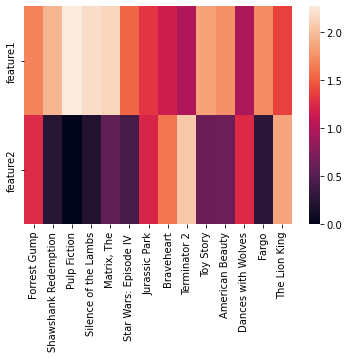

In [73]:
sns.heatmap(Q_df)

#### P: User-'genre' matrix

In [74]:
P = model.transform(Rtrue)
P

array([[1.39917283, 1.89436387],
       [1.92060389, 1.06204724],
       [1.51520935, 1.42557014],
       [1.93995559, 0.59324472],
       [1.25096624, 1.92716313],
       [1.95917424, 0.56608705],
       [1.89383581, 0.5824245 ],
       [2.45839009, 0.        ],
       [1.45930118, 1.11020277],
       [1.68458949, 0.43505528],
       [2.00765247, 0.56131118],
       [0.94642272, 1.77189389],
       [1.00641888, 1.65992437]])

In [75]:
P_df = pd.DataFrame(P, columns=['feature1', 'feature2'], index=df.index)
P_df

,feature1,feature2
User,,
Paula,1.399173,1.894364
Madhur,1.920604,1.062047
Mandana,1.515209,1.425570
Daniel,1.939956,0.593245
shaimaa,1.250966,1.927163
Edgar,1.959174,0.566087
Mitun,1.893836,0.582424
Georg,2.458390,0.000000
Hassan,1.459301,1.110203


<AxesSubplot:ylabel='User'>

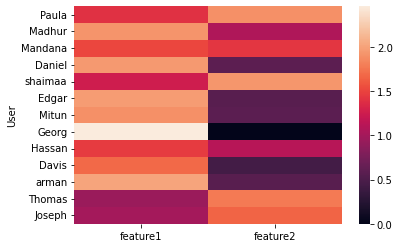

In [76]:
sns.heatmap(P_df)

In [77]:
model.reconstruction_err_

10.812211716475808

#### (Reconstruct predicted R) <- not necessary for predictions

In [78]:
R = pd.DataFrame(np.dot(P, Q).round(), index=df.index, columns=df.columns)

In [79]:
R

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,5.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0
Madhur,5.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0
Mandana,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,5.0
Daniel,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0
shaimaa,5.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,3.0,5.0
Edgar,4.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0
Mitun,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0
Georg,4.0,5.0,6.0,5.0,5.0,4.0,3.0,3.0,2.0,5.0,4.0,2.0,4.0,3.0
Hassan,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0


### 3. Predict i.e recommend

In [80]:
df.columns

Index(['Forrest Gump', 'Shawshank Redemption', 'Pulp Fiction',
       'Silence of the Lambs', 'Matrix, The', 'Star Wars: Episode IV ',
       'Jurassic Park', 'Braveheart', 'Terminator 2', 'Toy Story',
       'American Beauty', 'Dances with Wolves', 'Fargo', 'The Lion King'],
      dtype='object')

#### Get new ratings

In [85]:
df.loc[df.index == 'Mandana',:].values

array([[nan, nan,  4.,  5.,  5.,  2.,  4.,  5.,  5.,  4., nan, nan, nan,
         5.]])

In [86]:
user = df.loc[df.index == 'Mandana',:].values

In [87]:
user

array([[nan, nan,  4.,  5.,  5.,  2.,  4.,  5.,  5.,  4., nan, nan, nan,
         5.]])

#### Impute

In [88]:
user_clean = imputer.transform(user)

/Users/spiced/opt/anaconda3/envs/route_durlach/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [89]:
user_clean

array([[2.5, 2.5, 4. , 5. , 5. , 2. , 4. , 5. , 5. , 4. , 2.5, 2.5, 2.5,
        5. ]])

#### Predict user P

In [96]:
user_P = model.transform(user_clean)          # how strongly our user likes the 2 "genres"
user_P

array([[1.5151319 , 1.42564945]])

#### User R

In [97]:
#new user R - reconstruct R but for this new user only
user_R = np.dot(user_P,Q)

In [98]:
user_p_df = pd.DataFrame(user_R)
user_p_df.columns = df.columns
user_p_df

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
0,4.334079,3.289492,3.438782,3.59001,4.03985,2.91596,3.720437,4.04617,4.432729,3.683217,3.543902,3.214412,2.991786,4.74037


#### Remove movies user has already seen & give out recommendation

In [104]:
user[0]


array([nan, nan,  4.,  5.,  5.,  2.,  4.,  5.,  5.,  4., nan, nan, nan,
        5.])

In [106]:
recommendation = pd.DataFrame({'user_input':user[0], 'predicted_ratings':user_R[0]}, index = df.columns)

In [107]:
recommendation

,user_input,predicted_ratings
Forrest Gump,NaN,4.334079
Shawshank Redemption,NaN,3.289492
Pulp Fiction,4.0,3.438782
Silence of the Lambs,5.0,3.590010
"Matrix, The",5.0,4.039850
Star Wars: Episode IV,2.0,2.915960
Jurassic Park,4.0,3.720437
Braveheart,5.0,4.046170
Terminator 2,5.0,4.432729
Toy Story,4.0,3.683217


In [105]:
recommendation[recommendation['user_input'].isna()].sort_values(by = 'predicted_ratings', ascending= False)

NameError: name 'recommendation' is not defined

In [109]:
recommendation[recommendation['user_input'].isna()].sort_values(by = 'predicted_ratings', ascending= False).head(3)

,user_input,predicted_ratings
Forrest Gump,NaN,4.334079
American Beauty,NaN,3.543902
Shawshank Redemption,NaN,3.289492


## To use this for our project we need 
1. The user-ratings matrix
Use `pivot` `R = ratings.pivot(index = '___' ,columns = '___', values = '___')`
2. Follow the same steps in this notebook
3. Make it nicer, out it in a function

### The real use for our recommender

1. New user gives a dictionary of 3-5 movie:ratings 
    - "Movie title - rating form in your website" 
2. We recostruct the `new_user` and fill in with Nan everything that are not the movies mentioned
    - --> There will be a lot (A LOT, almost 10 000 `Nan`) 
3. Use the model as described in the notebook to give a recommendation

#### Helper functions for every recommender
- `def`: has the user watched the movie
- `def`: matching title with `fuzzywuzzy`

In [73]:
movies = pd.read_csv('data/movies_genres.csv')

In [78]:
movies[movies['title'] == 'Matrix, The']

,movieid,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
1939,2571,"Matrix, The",1999.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [77]:
movies[movies['title'] == 'The Matrix']

,movieid,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action


Solve the problem of users not writing the extact title with `fuzzywuzzy`:https://github.com/seatgeek/fuzzywuzzy

In [79]:
from fuzzywuzzy import process

In [81]:
process.extractOne('The Matrix', movies['title'])

('Matrix, The', 95, 1939)

In [84]:
process.extract('Shawshank Redemption', movies['title'])

[('Shawshank Redemption, The', 95, 277),
 ('Red', 90, 7445),
 ('Shane', 72, 2894),
 ('Jaws', 68, 1067),
 ('Tron', 68, 1567)]